# Data Scientist Nanodegree

## Data Science Blog

## Project: Analysis on data scientists based on Stack Overflow survey 

In this notebook , we explore the data from Stack Overflow Annual Developer Survey(https://insights.stackoverflow.com/survey) to give the newest overview of the data industry in 2021. In this notebook, I will follow a __CRISP-DM__ process:


First, from a __Business understanding__, I aim to find out the answers to the following three questions:

- __Q1: What proportion of developers work as data scientists?__
- __Q2: What programming languages do data scientists use mostly?__
- __Q3: What and Why should data scientists learn besides Python and SQL?__

From a __Data understanding__:
- Q1 requires data of devTypes developers reported in the survey
- Q2 and Q3 requires data of languages developers reported to have worked with in the survey
- Data of salary or income is also required in order to investigate the relation between developer types, programming skills and income.

For the __Data Preparation__ part:
- Data is already available as csv files in https://insights.stackoverflow.com/survey
- Pandas library can easily load, clean and analyze these data.

In the __Modeling__ part:
- My question requires no machine learning or deep learning models, therefore descriptive or inferential statistics will be provided.

For the final __Evaluation and Deployment__ part:
- Analysis based on this notebook will be posted in medium as a blog.
- The whole data analysis process will also be posted to a github repo so that it can be accessed by other developers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline


In [2]:
# load survey between 2019 and 2021
df1 = pd.read_csv(r'developer_survey_2021/survey_results_public.csv')
df2 = pd.read_csv(r'developer_survey_2020/survey_results_public.csv')
df3 = pd.read_csv(r'developer_survey_2019/survey_results_public.csv')

In [3]:
interestedColumns1 = ['ConvertedCompYearly','Country', 
                     'DevType','LanguageHaveWorkedWith','LanguageWantToWorkWith',
                      'MiscTechHaveWorkedWith','MiscTechWantToWorkWith']

In [4]:
df1 = df1[interestedColumns1]

In [5]:
# For comparability, I focus on data only from the USA
df1_USA = df1[df1['Country'] == 'United States of America']
df2_USA = df2[df2['Country'] == 'United States']
df3_USA = df3[df3['Country'] == 'United States']

In [6]:
# Since data will be grouped by DevType, missing values in this column are dropped
df1_USA = df1_USA.dropna(subset=['DevType'])
df2_USA = df2_USA.dropna(subset=['DevType'])
df3_USA = df3_USA.dropna(subset=['DevType'])

In [7]:
# create a dummy variable for DevType
dataReg = r"data|machine|deep"

df1_USA['isDataRelated'] = df1_USA['DevType'].apply(lambda row: 1 if re.search(dataReg, row, re.I) else 0)
df2_USA['isDataRelated'] = df2_USA['DevType'].apply(lambda row: 1 if re.search(dataReg, row, re.I) else 0)
df3_USA['isDataRelated'] = df3_USA['DevType'].apply(lambda row: 1 if re.search(dataReg, row, re.I) else 0)

# Q1: What proportion of developers work as data scientists?

In [9]:
r3 = df1_USA['isDataRelated'].sum()/df1_USA.shape[0]

In [10]:
r2 = df2_USA['isDataRelated'].sum()/df2_USA.shape[0]

In [11]:
r1 = df3_USA['isDataRelated'].sum()/df3_USA.shape[0]

In [13]:
print("{:.2%} of developers reported themselves as data scientists in 2021".format(r3))
print("{:.2%} of developers reported themselves as data scientists in 2020".format(r2))
print("{:.2%} of developers reported themselves as data scientists in 2019".format(r1))

21.67% of developers reported themselves as data scientists in 2021
26.62% of developers reported themselves as data scientists in 2020
26.17% of developers reported themselves as data scientists in 2019


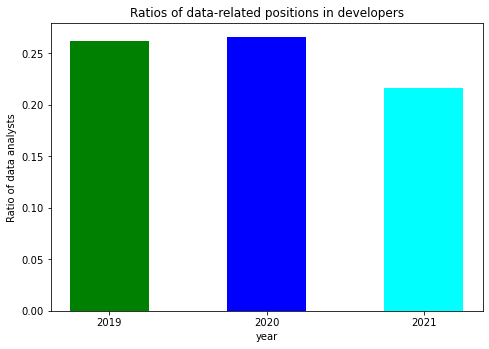

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
yrs = ['2019', '2020', '2021']
ratios = [r1,r2,r3]
ax.bar(yrs,ratios, width = 0.5, color=['green', 'blue', 'cyan'])
ax.set_title('Ratios of data-related positions in developers')
plt.xlabel("year")
plt.ylabel("Ratio of data analysts")
plt.show()

__It seems that in 2021 data science became less popular, at least in the USA. 
However, it should be noticed that more than 20% is still significant, especially under the pandemic.__

In the analysis below, I focused only on the data from 2021 survey.

In [14]:
DataRelatedDF = df1_USA[df1_USA['isDataRelated']==1]

In [16]:
# Create dummies for DevTypes
DataRelatedDF['isDataScientist'] = DataRelatedDF['DevType'].apply(lambda row: 1 if 'Data scientist or machine learning specialist' in row else 0)
DataRelatedDF['isDataAnalyst'] = DataRelatedDF['DevType'].apply(lambda row: 1 if 'Data or business analyst' in row else 0)
DataRelatedDF['isDataEngineer'] = DataRelatedDF['DevType'].apply(lambda row: 1 if 'Engineer, data' in row else 0)

<ipython-input-16-0d75cbb73082>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataRelatedDF['isDataScientist'] = DataRelatedDF['DevType'].apply(lambda row: 1 if 'Data scientist or machine learning specialist' in row else 0)
<ipython-input-16-0d75cbb73082>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataRelatedDF['isDataAnalyst'] = DataRelatedDF['DevType'].apply(lambda row: 1 if 'Data or business analyst' in row else 0)
<ipython-input-16-0d75cbb73082>:4: SettingWithCopyWarning: 
A value is trying to 

In [18]:
DS_cnt = DataRelatedDF['isDataScientist'].sum()
DA_cnt = DataRelatedDF['isDataAnalyst'].sum()
DE_cnt = DataRelatedDF['isDataEngineer'].sum()

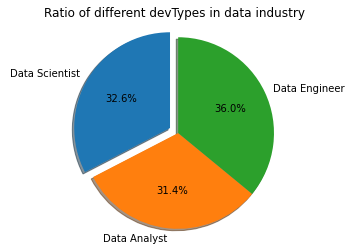

In [19]:
labels = 'Data Scientist', 'Data Analyst', 'Data Engineer'
sizes = [903, 871, 996]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Ratio of different devTypes in data industry')
ax1.axis('equal')  

plt.show()

In [21]:
print("{} developers reported themselves as data scientists in 2021".format(DS_cnt))
print("{} developers reported themselves as data analysts in 2021".format(DA_cnt))
print("{} developers reported themselves as data engineers in 2021".format(DE_cnt))

903 developers reported themselves as data scientists in 2021
871 developers reported themselves as data analysts in 2021
996 developers reported themselves as data engineers in 2021


# Q2: What programming languages do data scientists use mostly?

In [22]:
# In order to investigate languages used by data scientists, drop missing values in these two column
DataRelatedDF = DataRelatedDF.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

In [23]:
from collections import defaultdict

In [24]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            splits = set(df[col1][idx].split(';'))
            if val in splits:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [65]:
def clean_and_plot(df, index_name, column_name, title, possible_vals, plot=True, threshold=0):
    '''
    INPUT 
        df - a dataframe holding the DevType column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the DevType column.
    '''
    study = df[column_name].value_counts().reset_index()
    study.rename(columns={'index': index_name, column_name: 'count'}, inplace=True)
    #print(study)
    study_df = total_count(study, index_name, 'count', possible_vals)
    
    study_df.set_index(index_name, inplace=True)
    df_to_plot = (study_df/len(df))
    # dropna is necessary here for visualization, since elements < threshold become NaN in df_to_plot
    # without dropna, these columns with NaN will apear in the plot
    df_to_plot = df_to_plot[df_to_plot>=threshold]#.dropna()
    #print(df_to_plot)
    if plot:
        df_to_plot.plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/len(df)
    return props_study_df

In [26]:
# find out all languages appeared in our dataset and store in sets
PastLanguages = set()
for LanguageSet in DataRelatedDF['LanguageHaveWorkedWith']:
    try:
        PastLanguages = PastLanguages|set(LanguageSet.split(';'))
    except:
        continue

DesiredLanguages = set()
for LanguageSet in DataRelatedDF['LanguageWantToWorkWith']:
    try:
        DesiredLanguages = DesiredLanguages|set(LanguageSet.split(';'))
    except:
        continue

In [27]:
print(PastLanguages, '\n', DesiredLanguages)

{'SQL', 'Node.js', 'PHP', 'Java', 'Scala', 'Groovy', 'Elixir', 'Crystal', 'Perl', 'Swift', 'Objective-C', 'Assembly', 'Matlab', 'JavaScript', 'Bash/Shell', 'R', 'HTML/CSS', 'C++', 'F#', 'Clojure', 'APL', 'Delphi', 'Dart', 'Ruby', 'C#', 'Haskell', 'VBA', 'Erlang', 'Kotlin', 'COBOL', 'LISP', 'TypeScript', 'PowerShell', 'Go', 'Julia', 'C', 'Rust', 'Python'} 
 {'SQL', 'Node.js', 'PHP', 'Java', 'Scala', 'Groovy', 'Elixir', 'Crystal', 'Swift', 'Perl', 'Objective-C', 'Assembly', 'Matlab', 'JavaScript', 'Bash/Shell', 'R', 'HTML/CSS', 'C++', 'F#', 'Clojure', 'APL', 'Dart', 'Delphi', 'Ruby', 'C#', 'Haskell', 'VBA', 'Erlang', 'Kotlin', 'COBOL', 'LISP', 'TypeScript', 'PowerShell', 'Go', 'Julia', 'C', 'Rust', 'Python'}


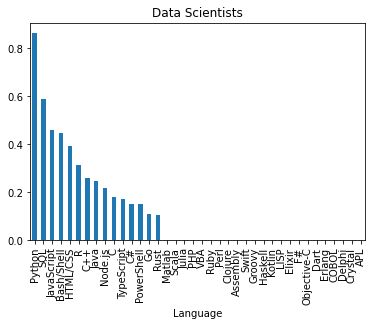

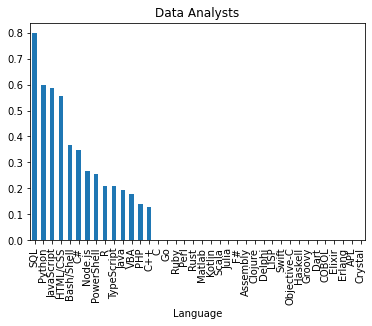

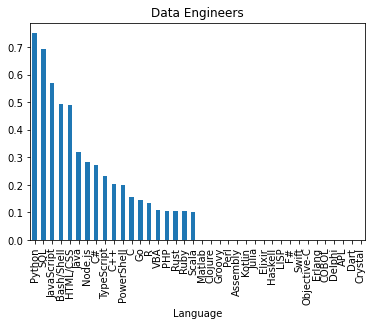

In [64]:
# Visualization of Languages data scientists report to have worked with, by devTypes
possible_vals = list(PastLanguages)
DataScientists = DataRelatedDF.query("isDataScientist==1")
props_DS = clean_and_plot(DataScientists, 
                          index_name='Language',column_name='LanguageHaveWorkedWith', title='Data Scientists',
                          possible_vals = possible_vals, threshold=0.1)

DataAnalysts = DataRelatedDF.query("isDataAnalyst==1")
props_DA = clean_and_plot(DataAnalysts, 
                          index_name='Language',column_name='LanguageHaveWorkedWith', title='Data Analysts',
                          possible_vals = possible_vals, threshold=0.1)

DataEngineers = DataRelatedDF.query("isDataEngineer==1")
props_DE = clean_and_plot(DataEngineers, 
                          index_name='Language',column_name='LanguageHaveWorkedWith', title='Data Engineers',
                          possible_vals = possible_vals, threshold=0.1)

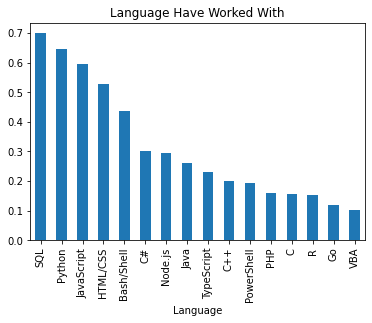

In [30]:
# Visualization of Languages data scientists report to have worked with
props_all = clean_and_plot(DataRelatedDF, 
                          index_name='Language',column_name='LanguageHaveWorkedWith', title='Language Have Worked With',
                          possible_vals = possible_vals, threshold=0.1)

__Focusing on the most popular languages among data scientists, SQL ranks top with over 70% of data scientists working with it, and Python ranks second with over 60%.
Here is the interesting story, we can see that JavaScript and HTML/CSS rank third and fourth. It seems that more than half of data scientists also work with these front-end languages.__

In [34]:
# Create dummies for languages
for Language in PastLanguages:
    DataRelatedDF[Language] = DataRelatedDF['LanguageHaveWorkedWith'].apply(lambda row: 1 if Language in row.split(';') else 0)

In [36]:
DataRelatedDF[PastLanguages].head()

,SQL,Node.js,PHP,Java,Scala,Groovy,Elixir,Crystal,Perl,Swift,...,Kotlin,COBOL,LISP,TypeScript,PowerShell,Go,Julia,C,Rust,Python
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
62,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
153,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1


In [37]:
DataRelatedDF[PastLanguages].sum().sort_values(ascending=False)

SQL            1783
Python         1650
JavaScript     1518
HTML/CSS       1342
Bash/Shell     1110
C#              772
Node.js         755
Java            665
TypeScript      585
C++             513
PowerShell      492
PHP             411
C               400
R               386
Go              304
VBA             262
Ruby            230
Rust            216
Perl            158
Scala           144
Matlab          141
Kotlin          120
Swift           106
Assembly        100
Julia            94
Groovy           94
Clojure          92
Objective-C      69
LISP             67
Dart             59
Elixir           57
Haskell          54
F#               50
Delphi           41
Erlang           32
Crystal          26
COBOL            25
APL              22
dtype: int64

In [50]:
# add a new column of language_cnt
DataRelatedDF['language_cnt'] = DataRelatedDF[PastLanguages].sum(axis=1)
language_cnt = DataRelatedDF.groupby('language_cnt')['ConvertedCompYearly'].count()

In [51]:
language_cnt

language_cnt
1      68
2     183
3     233
4     291
5     275
6     259
7     204
8     140
9     116
10     78
11     52
12     41
13     15
14     17
15     13
16      6
17      2
18      3
19      0
21      1
25      0
27      0
29      1
30      1
35      0
38      2
Name: ConvertedCompYearly, dtype: int64

In [52]:
sum(language_cnt[2:])/sum(language_cnt), sum(language_cnt[3:])/sum(language_cnt)

(0.8745627186406797, 0.7581209395302348)

__87.6% of data scientists report to have worked with at least 3 languages, and 75.8% of them report to have worked with more than 4 languages.__

# Q3: What and Why should data scientists learn besides Python and SQL?

In [53]:
# in order to see the relation between language_cnt and ConvertedCompYearly, drop missing values in ConvertedCompYearly
DataRelatedDF = DataRelatedDF.dropna(subset=['ConvertedCompYearly'])

In [54]:
DataRelatedDF.groupby('language_cnt')['ConvertedCompYearly'].median()[:19]

language_cnt
1     125000.0
2     120000.0
3     120000.0
4     113362.0
5     120000.0
6     110000.0
7     109500.0
8     126500.0
9     120000.0
10    142000.0
11    150000.0
12    115000.0
13    120000.0
14    137000.0
15    124000.0
16    162500.0
17    137500.0
18    195000.0
21    165000.0
Name: ConvertedCompYearly, dtype: float64

__Without surprise, more language skills generally also lead to higher competition and higher income in the data industry.__

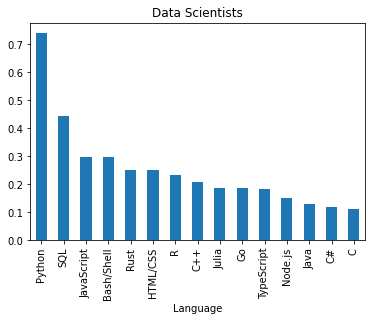

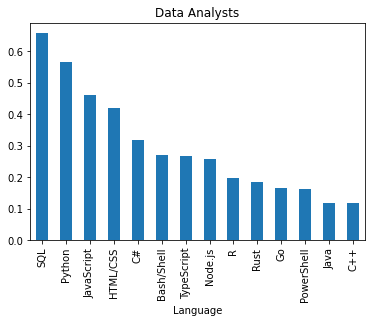

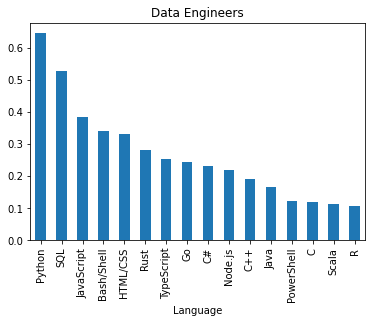

In [55]:
# Visualization of Languages data scientists report to want to work with, by devTypes
possible_vals = list(DesiredLanguages)
DataScientists = DataRelatedDF.query("isDataScientist==1")
props_DS = clean_and_plot(DataScientists, 
                          index_name='Language',column_name='LanguageWantToWorkWith', title='Data Scientists',
                          possible_vals = possible_vals, threshold=0.1)

DataAnalysts = DataRelatedDF.query("isDataAnalyst==1")
props_DA = clean_and_plot(DataAnalysts, 
                          index_name='Language',column_name='LanguageWantToWorkWith', title='Data Analysts',
                          possible_vals = possible_vals, threshold=0.1)

DataEngineers = DataRelatedDF.query("isDataEngineer==1")
props_DE = clean_and_plot(DataEngineers, 
                          index_name='Language',column_name='LanguageWantToWorkWith', title='Data Engineers',
                          possible_vals = possible_vals, threshold=0.1)

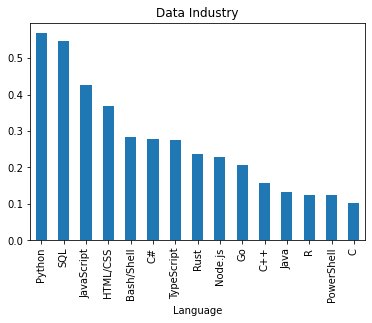

In [56]:
props_all = clean_and_plot(DataRelatedDF, 
                          index_name='Language',column_name='LanguageWantToWorkWith', title='Data Industry',
                          possible_vals = possible_vals, threshold=0.1)